In [1]:

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from statistics import mean
from tqdm import tqdm
import seaborn as sns
import pandas as pd

from data_readers import (
    japanese_vowels,
    water_quality,
    ionosphere,
    heart_attack,
    banana_quality,
    climate,
    diabetes,
    biodegradable,
    plates
)

from classes import (
    ADAMLogisticRegression,
    IWLSLogisticRegression,
    SGDLogisticRegression,
)


In [2]:
models = {
    "ADAM Logistic Regression": ADAMLogisticRegression(
        learning_rate=0.001,
        iterations=500,
        beta1=0.9,
        beta2=0.999,
        epsilon=1e-8,
        include_interactions=False,
    ),
    "SGD Logistic Regression": SGDLogisticRegression(
        learning_rate=0.01, iterations=500, include_interactions=False
    ),
    "IWLS Logistic Regression": IWLSLogisticRegression(
        iterations=500, include_interactions=False
    ),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

datasets = {
    "Water Quality": water_quality(),
    "Ionosphere": ionosphere(),
    "Heart Attack": heart_attack(),
    "Japanese Vowels": japanese_vowels(),
    "Banana quality": banana_quality(),
    "Climate": climate(),
    "Diabetes": diabetes(),
    "Biodegradable": biodegradable(),
    "Plates": plates()
}

In [3]:
n_runs = 5  # at least 5

scaler = StandardScaler()
dataset_performances = dict()
all_performances = []


for dataset_name, data in datasets.items():
    print(f"***{dataset_name}***\n")
    X, y = data
    models_performances = dict()
    for name, model in models.items():
        print(f"\t{name}")
        models_performances[name] = []
        for _ in tqdm(range(n_runs)):
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.2
             )

            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)

            model.fit(X_train_scaled, y_train)
            predictions = model.predict(X_test_scaled)

            accuracy = balanced_accuracy_score(y_test, predictions)
            models_performances[name].append(accuracy)

        value_ = round(mean(models_performances[name])*100, 2)
        print(f"Balanced accuracy: {value_}%\n\n")
    dataset_performances[dataset_name] = models_performances
    print(dataset_performances)


***Water Quality***

	ADAM Logistic Regression


100%|██████████| 5/5 [00:00<00:00,  5.62it/s]


Balanced accuracy: 51.45%


	SGD Logistic Regression


 40%|████      | 2/5 [00:00<00:00,  5.13it/s]

Optimization converged after 4 iterations.
Optimization converged after 4 iterations.


 80%|████████  | 4/5 [00:00<00:00,  4.83it/s]

Optimization converged after 4 iterations.
Optimization converged after 3 iterations.


100%|██████████| 5/5 [00:01<00:00,  4.76it/s]


Optimization converged after 4 iterations.
Balanced accuracy: 50.73%


	IWLS Logistic Regression


 20%|██        | 1/5 [00:00<00:00,  7.69it/s]

Optimization converged after 4 iterations.
Optimization converged after 4 iterations.


 60%|██████    | 3/5 [00:00<00:00, 12.94it/s]

Optimization converged after 4 iterations.
Optimization converged after 4 iterations.


100%|██████████| 5/5 [00:00<00:00, 11.33it/s]

Optimization converged after 4 iterations.


100%|██████████| 5/5 [00:00<00:00, 11.19it/s]


Balanced accuracy: 50.77%


	LDA


100%|██████████| 5/5 [00:00<00:00, 39.81it/s]


Balanced accuracy: 51.11%


	QDA


100%|██████████| 5/5 [00:00<00:00, 61.70it/s]


Balanced accuracy: 61.3%


	Decision Tree


100%|██████████| 5/5 [00:00<00:00, 23.09it/s]


Balanced accuracy: 99.28%


	Random Forest


100%|██████████| 5/5 [00:05<00:00,  1.06s/it]


Balanced accuracy: 84.54%


{'Water Quality': {'ADAM Logistic Regression': [0.508716060924779, 0.5221474588403723, 0.5278846153846154, 0.5068958818958819, 0.5068796776050661], 'SGD Logistic Regression': [0.5005907610731679, 0.5227104514822173, 0.5128237821084946, 0.5000975200647533, 0.5002767235926628], 'IWLS Logistic Regression': [0.5007177845676318, 0.5101225827213949, 0.5024599713083581, 0.5211033420126191, 0.503888485497], 'LDA': [0.5102564102564102, 0.5023066158374753, 0.5172122914289615, 0.5096270615426802, 0.51615473704008], 'QDA': [0.6148732220160792, 0.6152751423149905, 0.604708755480144, 0.6105589816180473, 0.6195050600885516], 'Decision Tree': [0.9959016393442623, 0.9876699181259059, 0.9888417413169888, 0.9968184684029293, 0.9949141705738753], 'Random Forest': [0.8453010215379875, 0.8419099310547162, 0.8394560701646407, 0.8443939171678647, 0.8561574171978692]}}
***Ionosphere***

	ADAM Logistic Regression


100%|██████████| 5/5 [00:00<00:00, 14.25it/s]


Balanced accuracy: 73.52%


	SGD Logistic Regression


100%|██████████| 5/5 [00:07<00:00,  1.41s/it]


Balanced accuracy: 69.29%


	IWLS Logistic Regression


100%|██████████| 5/5 [00:00<00:00, 45.85it/s]


Optimization converged after 10 iterations.
Optimization converged after 29 iterations.
Optimization converged after 17 iterations.
Optimization converged after 23 iterations.
Optimization converged after 22 iterations.
Balanced accuracy: 63.75%


	LDA


100%|██████████| 5/5 [00:00<00:00, 98.70it/s]


Balanced accuracy: 70.27%


	QDA


  0%|          | 0/5 [00:00<?, ?it/s]/home/nolok/anaconda3/envs/ssne/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/nolok/anaconda3/envs/ssne/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/nolok/anaconda3/envs/ssne/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/nolok/anaconda3/envs/ssne/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/nolok/anaconda3/envs/ssne/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
100%|██████████| 5/5 [00:00<00:00, 89.11it/s]


Balanced accuracy: 55.77%


	Decision Tree


100%|██████████| 5/5 [00:00<00:00, 105.55it/s]


Balanced accuracy: 80.58%


	Random Forest


100%|██████████| 5/5 [00:01<00:00,  4.47it/s]


Balanced accuracy: 84.74%


{'Water Quality': {'ADAM Logistic Regression': [0.508716060924779, 0.5221474588403723, 0.5278846153846154, 0.5068958818958819, 0.5068796776050661], 'SGD Logistic Regression': [0.5005907610731679, 0.5227104514822173, 0.5128237821084946, 0.5000975200647533, 0.5002767235926628], 'IWLS Logistic Regression': [0.5007177845676318, 0.5101225827213949, 0.5024599713083581, 0.5211033420126191, 0.503888485497], 'LDA': [0.5102564102564102, 0.5023066158374753, 0.5172122914289615, 0.5096270615426802, 0.51615473704008], 'QDA': [0.6148732220160792, 0.6152751423149905, 0.604708755480144, 0.6105589816180473, 0.6195050600885516], 'Decision Tree': [0.9959016393442623, 0.9876699181259059, 0.9888417413169888, 0.9968184684029293, 0.9949141705738753], 'Random Forest': [0.8453010215379875, 0.8419099310547162, 0.8394560701646407, 0.8443939171678647, 0.8561574171978692]}, 'Ionosphere': {'ADAM Logistic Regression': [0.7672131147540984, 0.7545454545454545, 0.5393939393939394, 0.819444444

100%|██████████| 5/5 [00:00<00:00, 20.12it/s]


Balanced accuracy: 83.44%


	SGD Logistic Regression


 20%|██        | 1/5 [00:00<00:00,  6.61it/s]

Optimization converged after 38 iterations.


 40%|████      | 2/5 [00:00<00:00,  5.21it/s]

Optimization converged after 73 iterations.


 80%|████████  | 4/5 [00:00<00:00,  5.26it/s]

Optimization converged after 73 iterations.
Optimization converged after 47 iterations.


100%|██████████| 5/5 [00:00<00:00,  5.36it/s]


Optimization converged after 52 iterations.
Balanced accuracy: 79.98%


	IWLS Logistic Regression


100%|██████████| 5/5 [00:00<00:00, 99.13it/s]


Optimization converged after 7 iterations.
Optimization converged after 8 iterations.
Optimization converged after 7 iterations.
Optimization converged after 7 iterations.
Optimization converged after 7 iterations.
Balanced accuracy: 78.65%


	LDA


100%|██████████| 5/5 [00:00<00:00, 124.29it/s]


Balanced accuracy: 81.53%


	QDA


100%|██████████| 5/5 [00:00<00:00, 105.99it/s]


Balanced accuracy: 81.59%


	Decision Tree


100%|██████████| 5/5 [00:00<00:00, 127.20it/s]


Balanced accuracy: 75.02%


	Random Forest


100%|██████████| 5/5 [00:00<00:00,  5.02it/s]


Balanced accuracy: 82.53%


{'Water Quality': {'ADAM Logistic Regression': [0.508716060924779, 0.5221474588403723, 0.5278846153846154, 0.5068958818958819, 0.5068796776050661], 'SGD Logistic Regression': [0.5005907610731679, 0.5227104514822173, 0.5128237821084946, 0.5000975200647533, 0.5002767235926628], 'IWLS Logistic Regression': [0.5007177845676318, 0.5101225827213949, 0.5024599713083581, 0.5211033420126191, 0.503888485497], 'LDA': [0.5102564102564102, 0.5023066158374753, 0.5172122914289615, 0.5096270615426802, 0.51615473704008], 'QDA': [0.6148732220160792, 0.6152751423149905, 0.604708755480144, 0.6105589816180473, 0.6195050600885516], 'Decision Tree': [0.9959016393442623, 0.9876699181259059, 0.9888417413169888, 0.9968184684029293, 0.9949141705738753], 'Random Forest': [0.8453010215379875, 0.8419099310547162, 0.8394560701646407, 0.8443939171678647, 0.8561574171978692]}, 'Ionosphere': {'ADAM Logistic Regression': [0.7672131147540984, 0.7545454545454545, 0.5393939393939394, 0.819444444

100%|██████████| 5/5 [00:01<00:00,  3.23it/s]


Balanced accuracy: 90.75%


	SGD Logistic Regression


 20%|██        | 1/5 [00:18<01:13, 18.42s/it]

Optimization converged after 152 iterations.


 40%|████      | 2/5 [00:28<00:40, 13.51s/it]

Optimization converged after 81 iterations.


 60%|██████    | 3/5 [00:38<00:23, 11.70s/it]

Optimization converged after 77 iterations.


 80%|████████  | 4/5 [01:02<00:16, 16.67s/it]

Optimization converged after 174 iterations.


100%|██████████| 5/5 [01:16<00:00, 15.36s/it]


Optimization converged after 129 iterations.
Balanced accuracy: 92.7%


	IWLS Logistic Regression


 20%|██        | 1/5 [00:01<00:05,  1.30s/it]

Optimization converged after 10 iterations.


 40%|████      | 2/5 [00:02<00:03,  1.05s/it]

Optimization converged after 10 iterations.


 60%|██████    | 3/5 [00:03<00:02,  1.04s/it]

Optimization converged after 10 iterations.


 80%|████████  | 4/5 [00:04<00:01,  1.00s/it]

Optimization converged after 10 iterations.


100%|██████████| 5/5 [00:05<00:00,  1.04s/it]


Optimization converged after 10 iterations.
Balanced accuracy: 92.66%


	LDA


100%|██████████| 5/5 [00:00<00:00, 31.95it/s]


Balanced accuracy: 88.67%


	QDA


100%|██████████| 5/5 [00:00<00:00, 70.50it/s]


Balanced accuracy: 96.8%


	Decision Tree


100%|██████████| 5/5 [00:00<00:00,  7.67it/s]


Balanced accuracy: 94.91%


	Random Forest


100%|██████████| 5/5 [00:08<00:00,  1.78s/it]


Balanced accuracy: 96.96%


{'Water Quality': {'ADAM Logistic Regression': [0.508716060924779, 0.5221474588403723, 0.5278846153846154, 0.5068958818958819, 0.5068796776050661], 'SGD Logistic Regression': [0.5005907610731679, 0.5227104514822173, 0.5128237821084946, 0.5000975200647533, 0.5002767235926628], 'IWLS Logistic Regression': [0.5007177845676318, 0.5101225827213949, 0.5024599713083581, 0.5211033420126191, 0.503888485497], 'LDA': [0.5102564102564102, 0.5023066158374753, 0.5172122914289615, 0.5096270615426802, 0.51615473704008], 'QDA': [0.6148732220160792, 0.6152751423149905, 0.604708755480144, 0.6105589816180473, 0.6195050600885516], 'Decision Tree': [0.9959016393442623, 0.9876699181259059, 0.9888417413169888, 0.9968184684029293, 0.9949141705738753], 'Random Forest': [0.8453010215379875, 0.8419099310547162, 0.8394560701646407, 0.8443939171678647, 0.8561574171978692]}, 'Ionosphere': {'ADAM Logistic Regression': [0.7672131147540984, 0.7545454545454545, 0.5393939393939394, 0.819444444

100%|██████████| 5/5 [00:01<00:00,  3.28it/s]


Balanced accuracy: 86.76%


	SGD Logistic Regression


 20%|██        | 1/5 [00:01<00:05,  1.45s/it]

Optimization converged after 11 iterations.


 40%|████      | 2/5 [00:03<00:05,  1.70s/it]

Optimization converged after 13 iterations.


 60%|██████    | 3/5 [00:04<00:03,  1.54s/it]

Optimization converged after 11 iterations.


 80%|████████  | 4/5 [00:06<00:01,  1.76s/it]

Optimization converged after 12 iterations.


100%|██████████| 5/5 [00:09<00:00,  1.84s/it]


Optimization converged after 11 iterations.
Balanced accuracy: 86.91%


	IWLS Logistic Regression


 20%|██        | 1/5 [00:00<00:03,  1.05it/s]

Optimization converged after 8 iterations.


 40%|████      | 2/5 [00:01<00:02,  1.46it/s]

Optimization converged after 8 iterations.


 60%|██████    | 3/5 [00:01<00:01,  1.67it/s]

Optimization converged after 8 iterations.


 80%|████████  | 4/5 [00:02<00:00,  1.84it/s]

Optimization converged after 8 iterations.


100%|██████████| 5/5 [00:03<00:00,  1.65it/s]


Optimization converged after 8 iterations.
Balanced accuracy: 87.93%


	LDA


100%|██████████| 5/5 [00:00<00:00, 58.93it/s]


Balanced accuracy: 87.55%


	QDA


100%|██████████| 5/5 [00:00<00:00, 97.45it/s]


Balanced accuracy: 91.92%


	Decision Tree


100%|██████████| 5/5 [00:00<00:00,  8.83it/s]


Balanced accuracy: 93.74%


	Random Forest


100%|██████████| 5/5 [00:08<00:00,  1.78s/it]


Balanced accuracy: 96.97%


{'Water Quality': {'ADAM Logistic Regression': [0.508716060924779, 0.5221474588403723, 0.5278846153846154, 0.5068958818958819, 0.5068796776050661], 'SGD Logistic Regression': [0.5005907610731679, 0.5227104514822173, 0.5128237821084946, 0.5000975200647533, 0.5002767235926628], 'IWLS Logistic Regression': [0.5007177845676318, 0.5101225827213949, 0.5024599713083581, 0.5211033420126191, 0.503888485497], 'LDA': [0.5102564102564102, 0.5023066158374753, 0.5172122914289615, 0.5096270615426802, 0.51615473704008], 'QDA': [0.6148732220160792, 0.6152751423149905, 0.604708755480144, 0.6105589816180473, 0.6195050600885516], 'Decision Tree': [0.9959016393442623, 0.9876699181259059, 0.9888417413169888, 0.9968184684029293, 0.9949141705738753], 'Random Forest': [0.8453010215379875, 0.8419099310547162, 0.8394560701646407, 0.8443939171678647, 0.8561574171978692]}, 'Ionosphere': {'ADAM Logistic Regression': [0.7672131147540984, 0.7545454545454545, 0.5393939393939394, 0.819444444

100%|██████████| 5/5 [00:00<00:00,  9.26it/s]


Balanced accuracy: 77.83%


	SGD Logistic Regression


 20%|██        | 1/5 [00:00<00:02,  1.61it/s]

Optimization converged after 113 iterations.


 40%|████      | 2/5 [00:01<00:01,  1.58it/s]

Optimization converged after 147 iterations.


 60%|██████    | 3/5 [00:02<00:01,  1.32it/s]

Optimization converged after 217 iterations.


 80%|████████  | 4/5 [00:03<00:01,  1.04s/it]

Optimization converged after 329 iterations.


100%|██████████| 5/5 [00:04<00:00,  1.20it/s]


Optimization converged after 125 iterations.
Balanced accuracy: 62.73%


	IWLS Logistic Regression


100%|██████████| 5/5 [00:00<00:00, 90.17it/s]


Optimization converged after 8 iterations.
Optimization converged after 8 iterations.
Optimization converged after 8 iterations.
Optimization converged after 8 iterations.
Optimization converged after 8 iterations.
Balanced accuracy: 61.91%


	LDA


100%|██████████| 5/5 [00:00<00:00, 102.25it/s]


Balanced accuracy: 59.11%


	QDA


100%|██████████| 5/5 [00:00<00:00, 166.46it/s]


Balanced accuracy: 55.09%


	Decision Tree


100%|██████████| 5/5 [00:00<00:00, 78.96it/s]


Balanced accuracy: 60.01%


	Random Forest


100%|██████████| 5/5 [00:01<00:00,  3.66it/s]


Balanced accuracy: 53.34%


{'Water Quality': {'ADAM Logistic Regression': [0.508716060924779, 0.5221474588403723, 0.5278846153846154, 0.5068958818958819, 0.5068796776050661], 'SGD Logistic Regression': [0.5005907610731679, 0.5227104514822173, 0.5128237821084946, 0.5000975200647533, 0.5002767235926628], 'IWLS Logistic Regression': [0.5007177845676318, 0.5101225827213949, 0.5024599713083581, 0.5211033420126191, 0.503888485497], 'LDA': [0.5102564102564102, 0.5023066158374753, 0.5172122914289615, 0.5096270615426802, 0.51615473704008], 'QDA': [0.6148732220160792, 0.6152751423149905, 0.604708755480144, 0.6105589816180473, 0.6195050600885516], 'Decision Tree': [0.9959016393442623, 0.9876699181259059, 0.9888417413169888, 0.9968184684029293, 0.9949141705738753], 'Random Forest': [0.8453010215379875, 0.8419099310547162, 0.8394560701646407, 0.8443939171678647, 0.8561574171978692]}, 'Ionosphere': {'ADAM Logistic Regression': [0.7672131147540984, 0.7545454545454545, 0.5393939393939394, 0.819444444

100%|██████████| 5/5 [00:00<00:00,  9.24it/s]


Balanced accuracy: 72.37%


	SGD Logistic Regression


 40%|████      | 2/5 [00:00<00:00,  5.28it/s]

Optimization converged after 25 iterations.
Optimization converged after 27 iterations.


 80%|████████  | 4/5 [00:00<00:00,  5.46it/s]

Optimization converged after 25 iterations.
Optimization converged after 29 iterations.


100%|██████████| 5/5 [00:00<00:00,  5.50it/s]


Optimization converged after 26 iterations.
Balanced accuracy: 71.42%


	IWLS Logistic Regression


100%|██████████| 5/5 [00:00<00:00, 82.62it/s]


Optimization converged after 6 iterations.
Optimization converged after 6 iterations.
Optimization converged after 6 iterations.
Optimization converged after 6 iterations.
Optimization converged after 6 iterations.
Balanced accuracy: 71.22%


	LDA


100%|██████████| 5/5 [00:00<00:00, 174.40it/s]


Balanced accuracy: 72.16%


	QDA


100%|██████████| 5/5 [00:00<00:00, 212.21it/s]


Balanced accuracy: 71.98%


	Decision Tree


100%|██████████| 5/5 [00:00<00:00, 115.70it/s]


Balanced accuracy: 65.69%


	Random Forest


100%|██████████| 5/5 [00:01<00:00,  3.27it/s]


Balanced accuracy: 71.13%


{'Water Quality': {'ADAM Logistic Regression': [0.508716060924779, 0.5221474588403723, 0.5278846153846154, 0.5068958818958819, 0.5068796776050661], 'SGD Logistic Regression': [0.5005907610731679, 0.5227104514822173, 0.5128237821084946, 0.5000975200647533, 0.5002767235926628], 'IWLS Logistic Regression': [0.5007177845676318, 0.5101225827213949, 0.5024599713083581, 0.5211033420126191, 0.503888485497], 'LDA': [0.5102564102564102, 0.5023066158374753, 0.5172122914289615, 0.5096270615426802, 0.51615473704008], 'QDA': [0.6148732220160792, 0.6152751423149905, 0.604708755480144, 0.6105589816180473, 0.6195050600885516], 'Decision Tree': [0.9959016393442623, 0.9876699181259059, 0.9888417413169888, 0.9968184684029293, 0.9949141705738753], 'Random Forest': [0.8453010215379875, 0.8419099310547162, 0.8394560701646407, 0.8443939171678647, 0.8561574171978692]}, 'Ionosphere': {'ADAM Logistic Regression': [0.7672131147540984, 0.7545454545454545, 0.5393939393939394, 0.819444444

100%|██████████| 5/5 [00:00<00:00, 14.90it/s]


Balanced accuracy: 87.32%


	SGD Logistic Regression


100%|██████████| 5/5 [00:31<00:00,  6.20s/it]


Balanced accuracy: 85.37%


	IWLS Logistic Regression


 60%|██████    | 3/5 [00:00<00:00, 23.53it/s]

Optimization converged after 16 iterations.
Optimization converged after 17 iterations.
Optimization converged after 17 iterations.
Optimization converged after 17 iterations.


100%|██████████| 5/5 [00:00<00:00, 23.15it/s]


Optimization converged after 17 iterations.
Balanced accuracy: 82.68%


	LDA


100%|██████████| 5/5 [00:00<00:00, 93.24it/s]


Balanced accuracy: 82.88%


	QDA


  0%|          | 0/5 [00:00<?, ?it/s]/home/nolok/anaconda3/envs/ssne/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/nolok/anaconda3/envs/ssne/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/nolok/anaconda3/envs/ssne/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/nolok/anaconda3/envs/ssne/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/nolok/anaconda3/envs/ssne/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
100%|██████████| 5/5 [00:00<00:00, 110.39it/s]


Balanced accuracy: 68.84%


	Decision Tree


100%|██████████| 5/5 [00:00<00:00, 64.33it/s]


Balanced accuracy: 80.26%


	Random Forest


100%|██████████| 5/5 [00:01<00:00,  3.11it/s]


Balanced accuracy: 84.66%


{'Water Quality': {'ADAM Logistic Regression': [0.508716060924779, 0.5221474588403723, 0.5278846153846154, 0.5068958818958819, 0.5068796776050661], 'SGD Logistic Regression': [0.5005907610731679, 0.5227104514822173, 0.5128237821084946, 0.5000975200647533, 0.5002767235926628], 'IWLS Logistic Regression': [0.5007177845676318, 0.5101225827213949, 0.5024599713083581, 0.5211033420126191, 0.503888485497], 'LDA': [0.5102564102564102, 0.5023066158374753, 0.5172122914289615, 0.5096270615426802, 0.51615473704008], 'QDA': [0.6148732220160792, 0.6152751423149905, 0.604708755480144, 0.6105589816180473, 0.6195050600885516], 'Decision Tree': [0.9959016393442623, 0.9876699181259059, 0.9888417413169888, 0.9968184684029293, 0.9949141705738753], 'Random Forest': [0.8453010215379875, 0.8419099310547162, 0.8394560701646407, 0.8443939171678647, 0.8561574171978692]}, 'Ionosphere': {'ADAM Logistic Regression': [0.7672131147540984, 0.7545454545454545, 0.5393939393939394, 0.819444444

  0%|          | 0/5 [00:00<?, ?it/s]/home/nolok/anaconda3/envs/ssne/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
 20%|██        | 1/5 [00:00<00:00,  9.16it/s]/home/nolok/anaconda3/envs/ssne/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/nolok/anaconda3/envs/ssne/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
 60%|██████    | 3/5 [00:00<00:00, 10.92it/s]/home/nolok/anaconda3/envs/ssne/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/nolok/anaconda3/envs/ssne/l

Balanced accuracy: 16.48%


	SGD Logistic Regression


  0%|          | 0/5 [00:00<?, ?it/s]/home/nolok/anaconda3/envs/ssne/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
 20%|██        | 1/5 [00:10<00:43, 10.75s/it]/home/nolok/anaconda3/envs/ssne/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
 40%|████      | 2/5 [00:22<00:33, 11.30s/it]/home/nolok/anaconda3/envs/ssne/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
 60%|██████    | 3/5 [00:33<00:22, 11.25s/it]/home/nolok/anaconda3/envs/ssne/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not 

Balanced accuracy: 47.07%


	IWLS Logistic Regression


  0%|          | 0/5 [00:00<?, ?it/s]/home/nolok/anaconda3/envs/ssne/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
 20%|██        | 1/5 [00:00<00:00,  7.26it/s]

Optimization converged after 25 iterations.


/home/nolok/anaconda3/envs/ssne/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
 40%|████      | 2/5 [00:00<00:00,  8.38it/s]

Optimization converged after 20 iterations.


/home/nolok/anaconda3/envs/ssne/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
 60%|██████    | 3/5 [00:00<00:00,  5.01it/s]/home/nolok/anaconda3/envs/ssne/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
 80%|████████  | 4/5 [00:00<00:00,  5.15it/s]

Optimization converged after 61 iterations.
Optimization converged after 38 iterations.


/home/nolok/anaconda3/envs/ssne/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
100%|██████████| 5/5 [00:01<00:00,  4.99it/s]


Optimization converged after 59 iterations.
Balanced accuracy: 47.05%


	LDA


100%|██████████| 5/5 [00:00<00:00, 75.54it/s]


Balanced accuracy: 68.17%


	QDA


  0%|          | 0/5 [00:00<?, ?it/s]/home/nolok/anaconda3/envs/ssne/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/nolok/anaconda3/envs/ssne/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/nolok/anaconda3/envs/ssne/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/nolok/anaconda3/envs/ssne/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/nolok/anaconda3/envs/ssne/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
100%|██████████| 5/5 [00:00<00:00, 129.53it/s]


Balanced accuracy: 100.0%


	Decision Tree


100%|██████████| 5/5 [00:00<00:00, 68.32it/s]

Balanced accuracy: 100.0%


	Random Forest



100%|██████████| 5/5 [00:01<00:00,  2.57it/s]

Balanced accuracy: 99.55%


{'Water Quality': {'ADAM Logistic Regression': [0.508716060924779, 0.5221474588403723, 0.5278846153846154, 0.5068958818958819, 0.5068796776050661], 'SGD Logistic Regression': [0.5005907610731679, 0.5227104514822173, 0.5128237821084946, 0.5000975200647533, 0.5002767235926628], 'IWLS Logistic Regression': [0.5007177845676318, 0.5101225827213949, 0.5024599713083581, 0.5211033420126191, 0.503888485497], 'LDA': [0.5102564102564102, 0.5023066158374753, 0.5172122914289615, 0.5096270615426802, 0.51615473704008], 'QDA': [0.6148732220160792, 0.6152751423149905, 0.604708755480144, 0.6105589816180473, 0.6195050600885516], 'Decision Tree': [0.9959016393442623, 0.9876699181259059, 0.9888417413169888, 0.9968184684029293, 0.9949141705738753], 'Random Forest': [0.8453010215379875, 0.8419099310547162, 0.8394560701646407, 0.8443939171678647, 0.8561574171978692]}, 'Ionosphere': {'ADAM Logistic Regression': [0.7672131147540984, 0.7545454545454545, 0.5393939393939394, 0.819444444

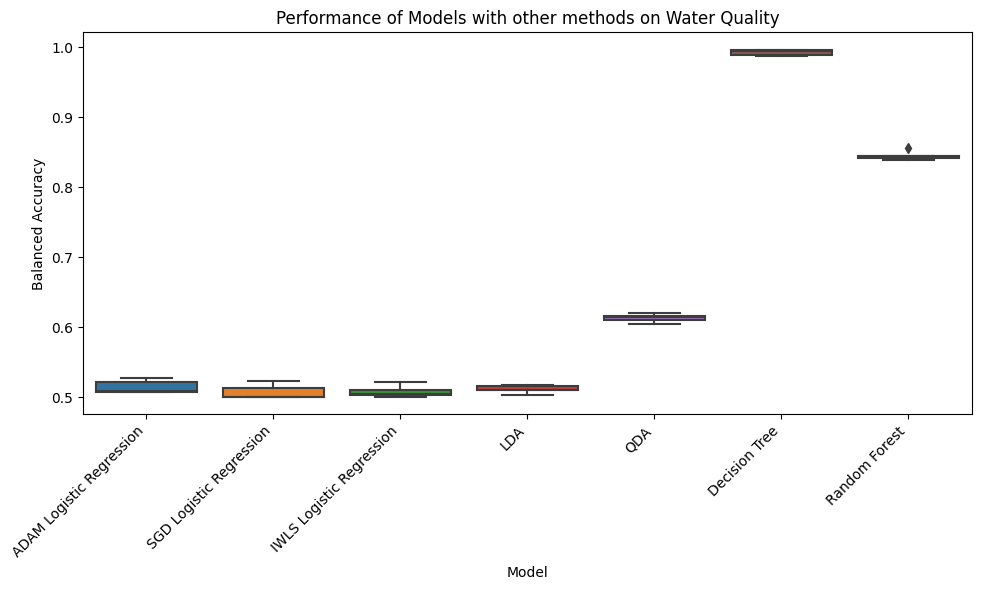

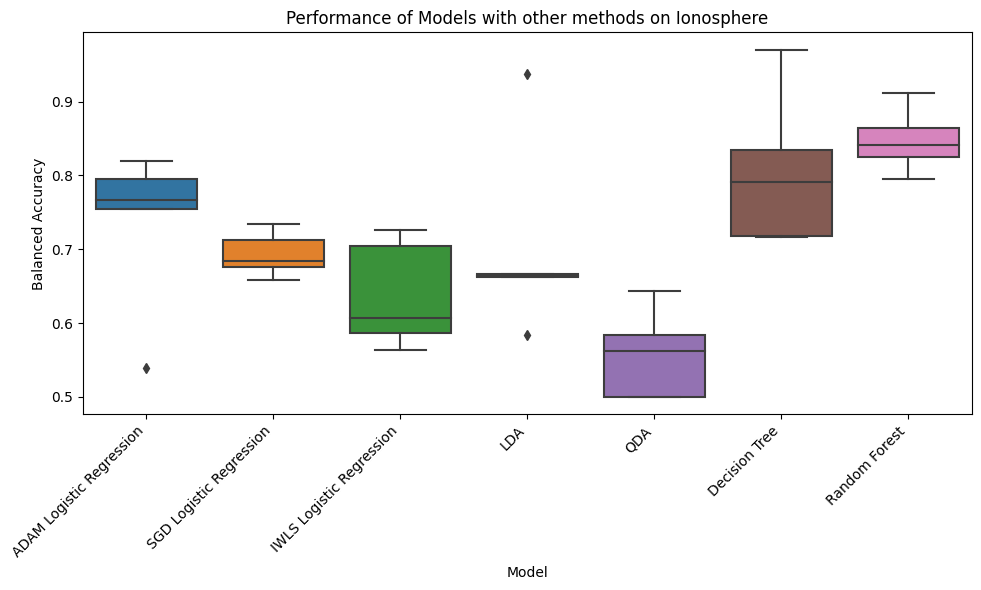

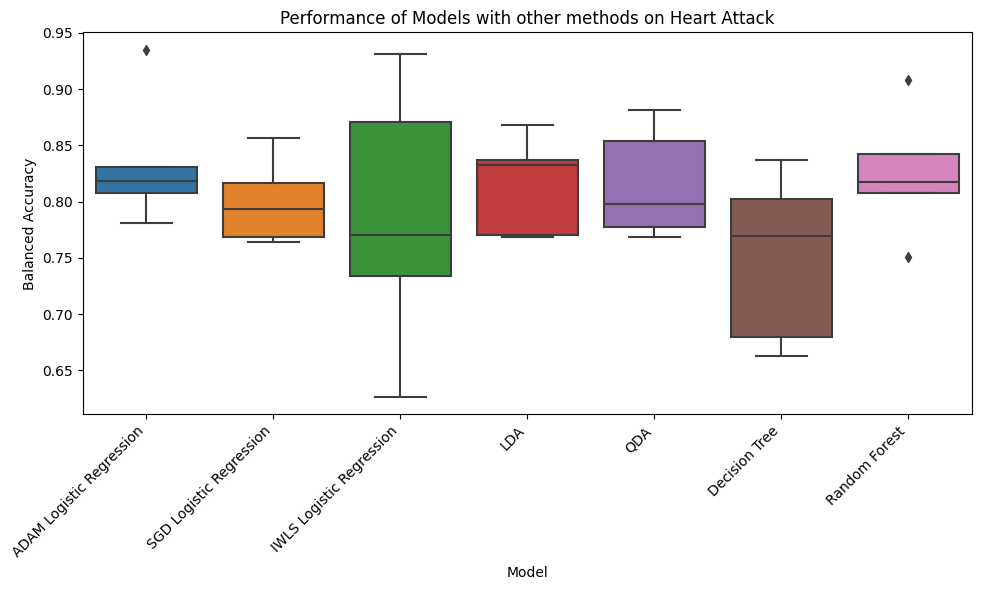

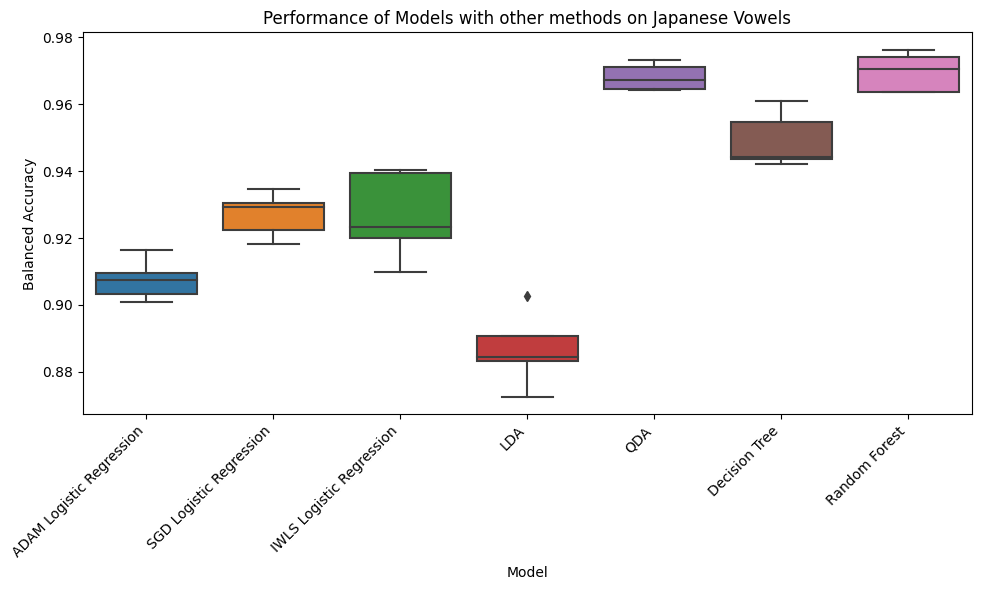

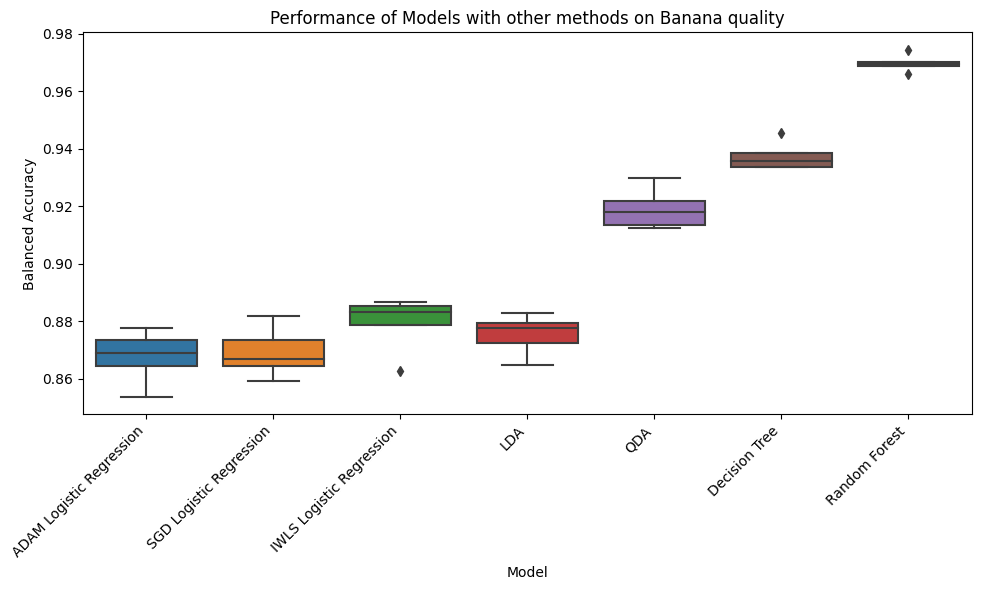

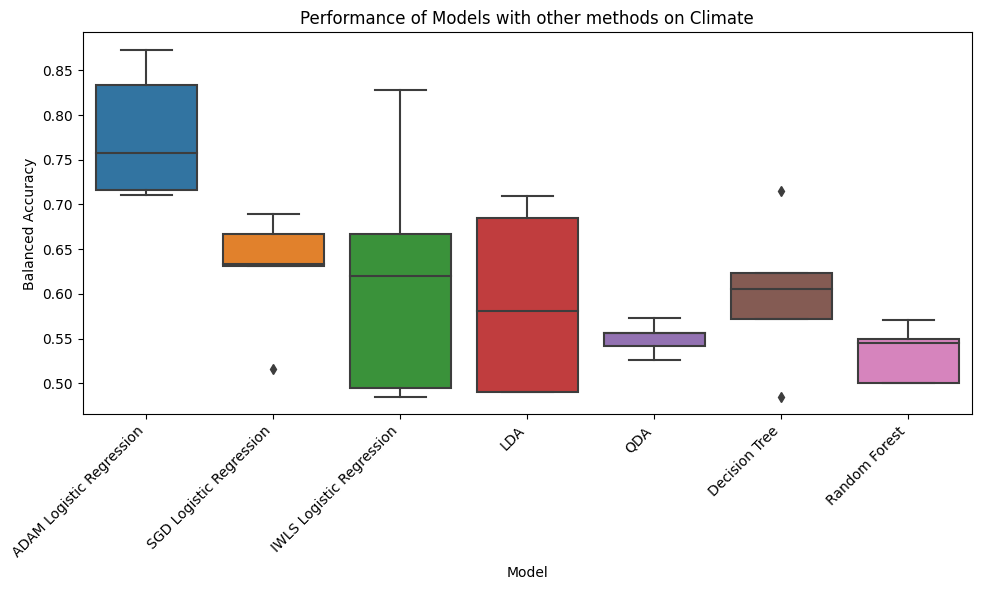

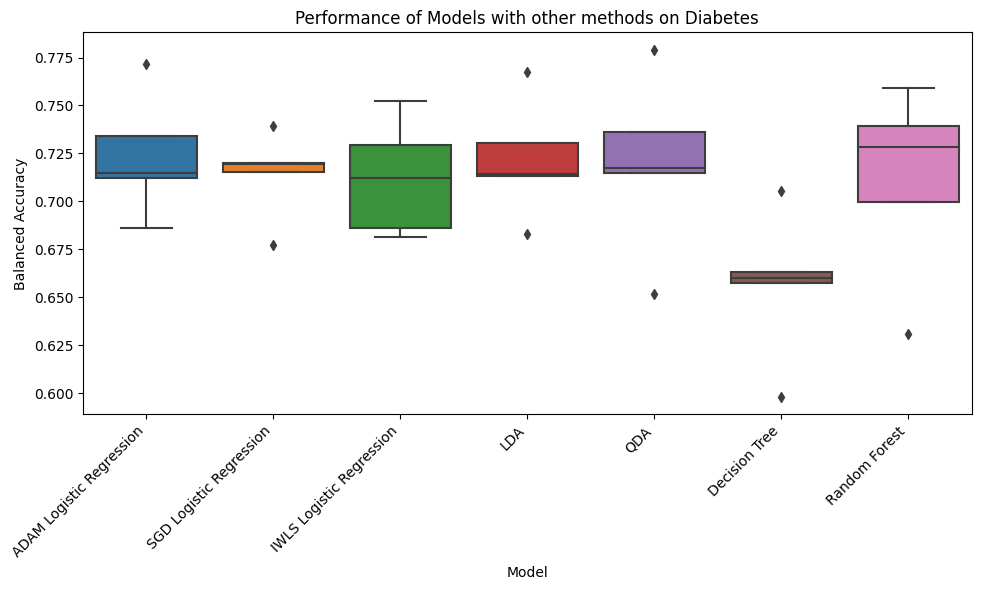

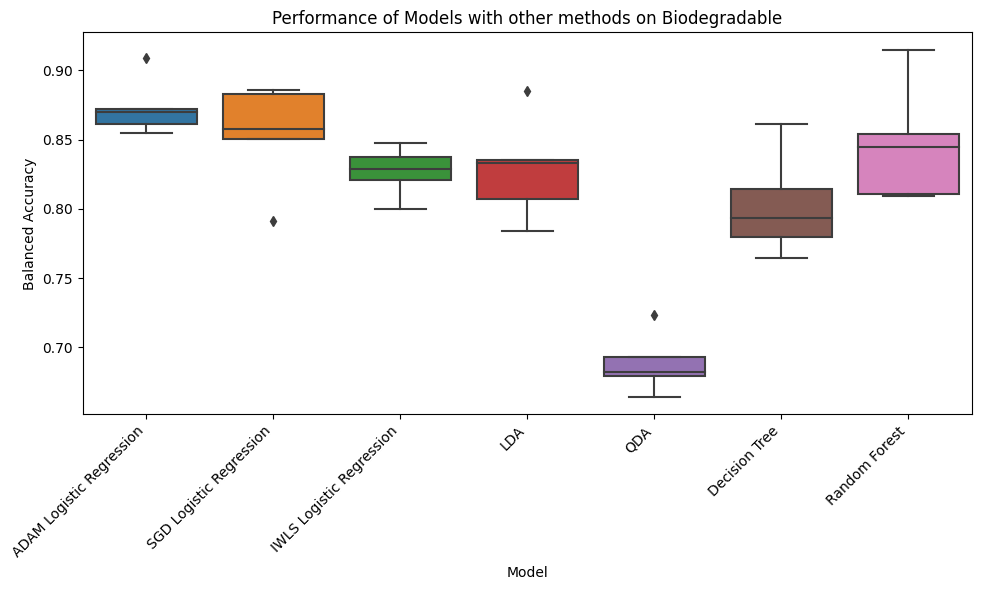

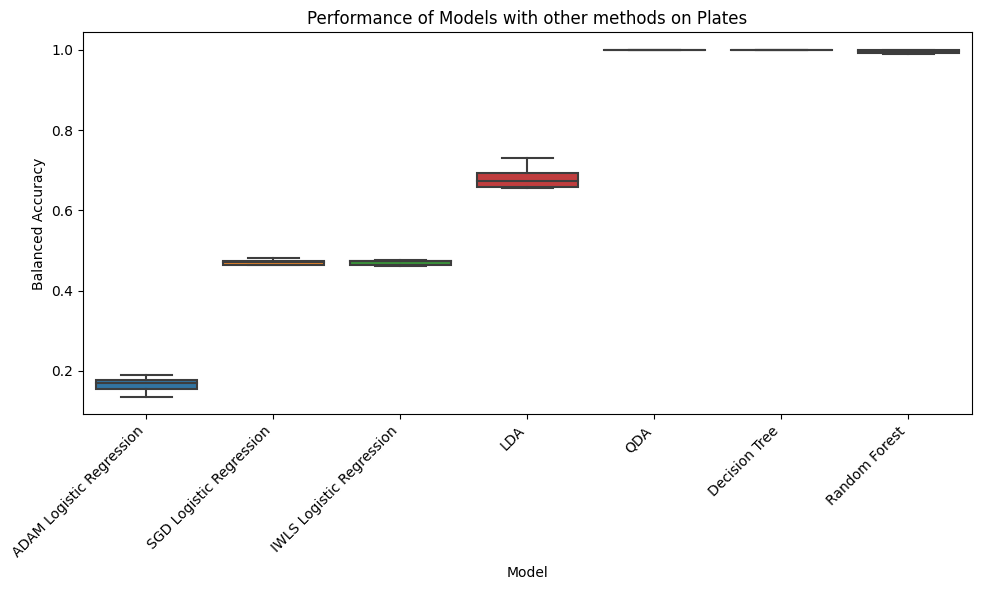

In [4]:
for dataset_name, performances in dataset_performances.items():
    plt.figure(figsize=(10, 6))
    plt.title(f"Performance of Models with other methods on {dataset_name}")

    # Convert performances dictionary to a DataFrame for easier plotting
    df = pd.DataFrame(performances)

    # Plotting boxplot
    sns.boxplot(data=df)

    plt.xlabel("Model")
    plt.ylabel("Balanced Accuracy")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    title_ = dataset_name.lower().replace(" ", "_")
    plt.savefig(f"plots/comparison_others/{title_}.png")
    plt.show()


In [5]:
models_interactions = {
    "ADAM Logistic Regression": ADAMLogisticRegression(
        learning_rate=0.001,
        iterations=500,
        beta1=0.9,
        beta2=0.999,
        epsilon=1e-8,
        include_interactions=False,
    ),
    "ADAM Logistic Regression with interactions": ADAMLogisticRegression(
        learning_rate=0.001,
        iterations=500,
        beta1=0.9,
        beta2=0.999,
        epsilon=1e-8,
        include_interactions=True,
    ),
    "SGD Logistic Regression": SGDLogisticRegression(
        learning_rate=0.01, iterations=500, include_interactions=False
    ),
    "SGD Logistic Regression with interactions": SGDLogisticRegression(
        learning_rate=0.01, iterations=500, include_interactions=True
    ),
    "IWLS Logistic Regression": IWLSLogisticRegression(
        iterations=500, include_interactions=False
    ),
    "IWLS Logistic Regression with interactions": IWLSLogisticRegression(
        iterations=500, include_interactions=True
    )
}

datasets_small = {
    "Water Quality": water_quality(),
    "Banana quality": banana_quality(),
    "Diabetes": diabetes()
}


In [6]:
n_runs = 10  # at least 5

scaler = StandardScaler()
dataset_performances2 = dict()
all_performances = []

for dataset_name, data in datasets_small.items():
    print(f"***{dataset_name}***\n")
    X, y = data
    models_performances = dict()
    for name, model in models_interactions.items():
        print(f"\t{name}")
        models_performances[name] = []
        for _ in tqdm(range(n_runs)):
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.2
            )

            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)

            model.fit(X_train_scaled, y_train)
            predictions = model.predict(X_test_scaled)

            accuracy = balanced_accuracy_score(y_test, predictions)
            models_performances[name].append(accuracy)

        value_ = round(mean(models_performances[name])*100, 2)
        print(f"Balanced accuracy: {value_}%\n\n")

    dataset_performances2[dataset_name] = models_performances
    print(dataset_performances2)


***Water Quality***

	ADAM Logistic Regression


100%|██████████| 10/10 [00:01<00:00,  6.60it/s]


Balanced accuracy: 51.75%


	ADAM Logistic Regression with interactions


100%|██████████| 10/10 [00:01<00:00,  6.57it/s]


Balanced accuracy: 60.86%


	SGD Logistic Regression


 20%|██        | 2/10 [00:00<00:01,  5.02it/s]

Optimization converged after 4 iterations.
Optimization converged after 4 iterations.


 40%|████      | 4/10 [00:00<00:01,  5.07it/s]

Optimization converged after 4 iterations.
Optimization converged after 4 iterations.


 60%|██████    | 6/10 [00:01<00:00,  5.38it/s]

Optimization converged after 4 iterations.
Optimization converged after 4 iterations.


 70%|███████   | 7/10 [00:01<00:00,  5.37it/s]

Optimization converged after 4 iterations.


 90%|█████████ | 9/10 [00:01<00:00,  4.65it/s]

Optimization converged after 4 iterations.
Optimization converged after 4 iterations.


100%|██████████| 10/10 [00:02<00:00,  4.85it/s]


Optimization converged after 4 iterations.
Balanced accuracy: 51.25%


	SGD Logistic Regression with interactions


 10%|█         | 1/10 [00:00<00:02,  4.11it/s]

Optimization converged after 5 iterations.


 20%|██        | 2/10 [00:00<00:02,  3.44it/s]

Optimization converged after 7 iterations.


 30%|███       | 3/10 [00:00<00:02,  3.08it/s]

Optimization converged after 7 iterations.


 40%|████      | 4/10 [00:01<00:01,  3.03it/s]

Optimization converged after 7 iterations.


 50%|█████     | 5/10 [00:01<00:01,  2.93it/s]

Optimization converged after 7 iterations.


 60%|██████    | 6/10 [00:02<00:01,  2.84it/s]

Optimization converged after 7 iterations.


 70%|███████   | 7/10 [00:02<00:01,  2.84it/s]

Optimization converged after 7 iterations.


 80%|████████  | 8/10 [00:02<00:00,  2.93it/s]

Optimization converged after 6 iterations.


 90%|█████████ | 9/10 [00:03<00:00,  2.91it/s]

Optimization converged after 7 iterations.


100%|██████████| 10/10 [00:03<00:00,  2.95it/s]


Optimization converged after 7 iterations.
Balanced accuracy: 59.37%


	IWLS Logistic Regression


 10%|█         | 1/10 [00:00<00:01,  8.76it/s]

Optimization converged after 4 iterations.
Optimization converged after 4 iterations.


 30%|███       | 3/10 [00:00<00:00, 14.39it/s]

Optimization converged after 4 iterations.
Optimization converged after 4 iterations.


 50%|█████     | 5/10 [00:00<00:00, 14.24it/s]

Optimization converged after 4 iterations.


 70%|███████   | 7/10 [00:00<00:00, 14.09it/s]

Optimization converged after 4 iterations.
Optimization converged after 4 iterations.
Optimization converged after 4 iterations.


 90%|█████████ | 9/10 [00:00<00:00, 12.96it/s]

Optimization converged after 4 iterations.


100%|██████████| 10/10 [00:00<00:00, 10.70it/s]


Optimization converged after 4 iterations.
Balanced accuracy: 51.2%


	IWLS Logistic Regression with interactions


 20%|██        | 2/10 [00:00<00:02,  3.52it/s]

Optimization converged after 6 iterations.
Optimization converged after 6 iterations.


 40%|████      | 4/10 [00:00<00:01,  5.24it/s]

Optimization converged after 6 iterations.
Optimization converged after 6 iterations.


 60%|██████    | 6/10 [00:01<00:00,  5.86it/s]

Optimization converged after 6 iterations.
Optimization converged after 6 iterations.


 80%|████████  | 8/10 [00:01<00:00,  6.56it/s]

Optimization converged after 6 iterations.
Optimization converged after 6 iterations.


100%|██████████| 10/10 [00:01<00:00,  5.64it/s]


Optimization converged after 6 iterations.
Optimization converged after 6 iterations.
Balanced accuracy: 60.68%


{'Water Quality': {'ADAM Logistic Regression': [0.5166047386961348, 0.5205713259072943, 0.5057506053268765, 0.5193618521565402, 0.5125801282051282, 0.5036736420987844, 0.5277375760770595, 0.5217148792121865, 0.5157058334555767, 0.5312120429613902], 'ADAM Logistic Regression with interactions': [0.6052634192363077, 0.6131870960078398, 0.6369334430211149, 0.6023356324561144, 0.6090208499847054, 0.5977564102564102, 0.6028846153846154, 0.5967635630318233, 0.615735171874236, 0.6061580882352942], 'SGD Logistic Regression': [0.5311483409238776, 0.5107808431584798, 0.5013319230618561, 0.5083946866113513, 0.5242562929061785, 0.5028760076153441, 0.4838700097997486, 0.5273201251303441, 0.5252867543616442, 0.5095904212035495], 'SGD Logistic Regression with interactions': [0.5646118183246897, 0.6011459493872353, 0.604058620147729, 0.5967093596059113, 0.5791413373860183, 0.59087684729064

100%|██████████| 10/10 [00:02<00:00,  4.31it/s]


Balanced accuracy: 87.12%


	ADAM Logistic Regression with interactions


100%|██████████| 10/10 [00:03<00:00,  2.93it/s]


Balanced accuracy: 93.7%


	SGD Logistic Regression


 10%|█         | 1/10 [00:01<00:09,  1.03s/it]

Optimization converged after 10 iterations.


 20%|██        | 2/10 [00:01<00:07,  1.06it/s]

Optimization converged after 9 iterations.


 30%|███       | 3/10 [00:03<00:07,  1.04s/it]

Optimization converged after 12 iterations.


 40%|████      | 4/10 [00:04<00:06,  1.03s/it]

Optimization converged after 10 iterations.


 50%|█████     | 5/10 [00:05<00:05,  1.02s/it]

Optimization converged after 10 iterations.


 60%|██████    | 6/10 [00:06<00:04,  1.04s/it]

Optimization converged after 11 iterations.


 70%|███████   | 7/10 [00:07<00:03,  1.06s/it]

Optimization converged after 11 iterations.


 80%|████████  | 8/10 [00:08<00:02,  1.09s/it]

Optimization converged after 10 iterations.


 90%|█████████ | 9/10 [00:09<00:01,  1.18s/it]

Optimization converged after 12 iterations.


100%|██████████| 10/10 [00:10<00:00,  1.09s/it]


Optimization converged after 11 iterations.
Balanced accuracy: 88.23%


	SGD Logistic Regression with interactions


 10%|█         | 1/10 [00:06<01:01,  6.79s/it]

Optimization converged after 70 iterations.


 20%|██        | 2/10 [00:11<00:45,  5.70s/it]

Optimization converged after 46 iterations.


 30%|███       | 3/10 [00:17<00:40,  5.76s/it]

Optimization converged after 57 iterations.


 40%|████      | 4/10 [00:21<00:29,  4.96s/it]

Optimization converged after 33 iterations.


 50%|█████     | 5/10 [00:26<00:25,  5.17s/it]

Optimization converged after 58 iterations.


 60%|██████    | 6/10 [00:32<00:21,  5.30s/it]

Optimization converged after 59 iterations.


 70%|███████   | 7/10 [00:37<00:15,  5.21s/it]

Optimization converged after 54 iterations.


 80%|████████  | 8/10 [00:43<00:10,  5.38s/it]

Optimization converged after 62 iterations.


 90%|█████████ | 9/10 [00:47<00:05,  5.14s/it]

Optimization converged after 49 iterations.


100%|██████████| 10/10 [00:52<00:00,  5.22s/it]


Optimization converged after 49 iterations.
Balanced accuracy: 95.24%


	IWLS Logistic Regression


 10%|█         | 1/10 [00:00<00:05,  1.51it/s]

Optimization converged after 8 iterations.


 20%|██        | 2/10 [00:01<00:04,  1.78it/s]

Optimization converged after 8 iterations.


 30%|███       | 3/10 [00:01<00:03,  1.80it/s]

Optimization converged after 8 iterations.


 40%|████      | 4/10 [00:02<00:03,  1.90it/s]

Optimization converged after 8 iterations.


 50%|█████     | 5/10 [00:02<00:02,  1.86it/s]

Optimization converged after 8 iterations.


 60%|██████    | 6/10 [00:03<00:02,  1.95it/s]

Optimization converged after 8 iterations.


 70%|███████   | 7/10 [00:03<00:01,  1.98it/s]

Optimization converged after 8 iterations.


 80%|████████  | 8/10 [00:04<00:00,  2.01it/s]

Optimization converged after 8 iterations.


 90%|█████████ | 9/10 [00:04<00:00,  1.84it/s]

Optimization converged after 8 iterations.


100%|██████████| 10/10 [00:05<00:00,  1.89it/s]


Optimization converged after 8 iterations.
Balanced accuracy: 87.29%


	IWLS Logistic Regression with interactions


 10%|█         | 1/10 [00:00<00:06,  1.45it/s]

Optimization converged after 9 iterations.


 20%|██        | 2/10 [00:01<00:05,  1.40it/s]

Optimization converged after 9 iterations.


 30%|███       | 3/10 [00:02<00:05,  1.28it/s]

Optimization converged after 9 iterations.


 40%|████      | 4/10 [00:02<00:04,  1.35it/s]

Optimization converged after 9 iterations.


 50%|█████     | 5/10 [00:03<00:03,  1.40it/s]

Optimization converged after 9 iterations.


 60%|██████    | 6/10 [00:04<00:02,  1.37it/s]

Optimization converged after 9 iterations.


 70%|███████   | 7/10 [00:05<00:02,  1.41it/s]

Optimization converged after 9 iterations.


 80%|████████  | 8/10 [00:05<00:01,  1.32it/s]

Optimization converged after 10 iterations.


 90%|█████████ | 9/10 [00:06<00:00,  1.26it/s]

Optimization converged after 9 iterations.


100%|██████████| 10/10 [00:07<00:00,  1.34it/s]


Optimization converged after 9 iterations.
Balanced accuracy: 95.37%


{'Water Quality': {'ADAM Logistic Regression': [0.5166047386961348, 0.5205713259072943, 0.5057506053268765, 0.5193618521565402, 0.5125801282051282, 0.5036736420987844, 0.5277375760770595, 0.5217148792121865, 0.5157058334555767, 0.5312120429613902], 'ADAM Logistic Regression with interactions': [0.6052634192363077, 0.6131870960078398, 0.6369334430211149, 0.6023356324561144, 0.6090208499847054, 0.5977564102564102, 0.6028846153846154, 0.5967635630318233, 0.615735171874236, 0.6061580882352942], 'SGD Logistic Regression': [0.5311483409238776, 0.5107808431584798, 0.5013319230618561, 0.5083946866113513, 0.5242562929061785, 0.5028760076153441, 0.4838700097997486, 0.5273201251303441, 0.5252867543616442, 0.5095904212035495], 'SGD Logistic Regression with interactions': [0.5646118183246897, 0.6011459493872353, 0.604058620147729, 0.5967093596059113, 0.5791413373860183, 0.5908768472906404, 0.6000509264700121, 0.5954100077540456,

100%|██████████| 10/10 [00:00<00:00, 10.28it/s]


Balanced accuracy: 71.0%


	ADAM Logistic Regression with interactions


100%|██████████| 10/10 [00:00<00:00, 13.32it/s]


Balanced accuracy: 69.93%


	SGD Logistic Regression


 20%|██        | 2/10 [00:00<00:01,  4.92it/s]

Optimization converged after 27 iterations.
Optimization converged after 27 iterations.


 40%|████      | 4/10 [00:00<00:01,  4.90it/s]

Optimization converged after 26 iterations.
Optimization converged after 30 iterations.


 60%|██████    | 6/10 [00:01<00:00,  5.43it/s]

Optimization converged after 29 iterations.
Optimization converged after 24 iterations.


 80%|████████  | 8/10 [00:01<00:00,  6.02it/s]

Optimization converged after 24 iterations.
Optimization converged after 19 iterations.


100%|██████████| 10/10 [00:01<00:00,  5.74it/s]


Optimization converged after 13 iterations.
Optimization converged after 27 iterations.
Balanced accuracy: 72.79%


	SGD Logistic Regression with interactions


 10%|█         | 1/10 [00:00<00:07,  1.23it/s]

Optimization converged after 86 iterations.


 20%|██        | 2/10 [00:01<00:07,  1.12it/s]

Optimization converged after 98 iterations.


 30%|███       | 3/10 [00:02<00:05,  1.29it/s]

Optimization converged after 56 iterations.


 40%|████      | 4/10 [00:03<00:04,  1.30it/s]

Optimization converged after 75 iterations.


 50%|█████     | 5/10 [00:04<00:04,  1.22it/s]

Optimization converged after 96 iterations.


 60%|██████    | 6/10 [00:04<00:03,  1.17it/s]

Optimization converged after 96 iterations.


 70%|███████   | 7/10 [00:05<00:02,  1.11it/s]

Optimization converged after 99 iterations.


 80%|████████  | 8/10 [00:06<00:01,  1.16it/s]

Optimization converged after 77 iterations.


 90%|█████████ | 9/10 [00:07<00:00,  1.18it/s]

Optimization converged after 78 iterations.


100%|██████████| 10/10 [00:08<00:00,  1.21it/s]


Optimization converged after 67 iterations.
Balanced accuracy: 71.74%


	IWLS Logistic Regression


100%|██████████| 10/10 [00:00<00:00, 82.27it/s]


Optimization converged after 6 iterations.
Optimization converged after 6 iterations.
Optimization converged after 6 iterations.
Optimization converged after 6 iterations.
Optimization converged after 6 iterations.
Optimization converged after 6 iterations.
Optimization converged after 6 iterations.
Optimization converged after 6 iterations.
Optimization converged after 6 iterations.
Optimization converged after 6 iterations.
Balanced accuracy: 72.29%


	IWLS Logistic Regression with interactions


  0%|          | 0/10 [00:00<?, ?it/s]

Optimization converged after 7 iterations.
Optimization converged after 7 iterations.
Optimization converged after 7 iterations.
Optimization converged after 7 iterations.


100%|██████████| 10/10 [00:00<00:00, 48.17it/s]

Optimization converged after 7 iterations.
Optimization converged after 7 iterations.
Optimization converged after 7 iterations.
Optimization converged after 7 iterations.
Optimization converged after 7 iterations.
Optimization converged after 7 iterations.
Balanced accuracy: 70.91%


{'Water Quality': {'ADAM Logistic Regression': [0.5166047386961348, 0.5205713259072943, 0.5057506053268765, 0.5193618521565402, 0.5125801282051282, 0.5036736420987844, 0.5277375760770595, 0.5217148792121865, 0.5157058334555767, 0.5312120429613902], 'ADAM Logistic Regression with interactions': [0.6052634192363077, 0.6131870960078398, 0.6369334430211149, 0.6023356324561144, 0.6090208499847054, 0.5977564102564102, 0.6028846153846154, 0.5967635630318233, 0.615735171874236, 0.6061580882352942], 'SGD Logistic Regression': [0.5311483409238776, 0.5107808431584798, 0.5013319230618561, 0.5083946866113513, 0.5242562929061785, 0.5028760076153441, 0.4838700097997486, 0.5273201251303441, 0.5252867543616442, 0.50959042

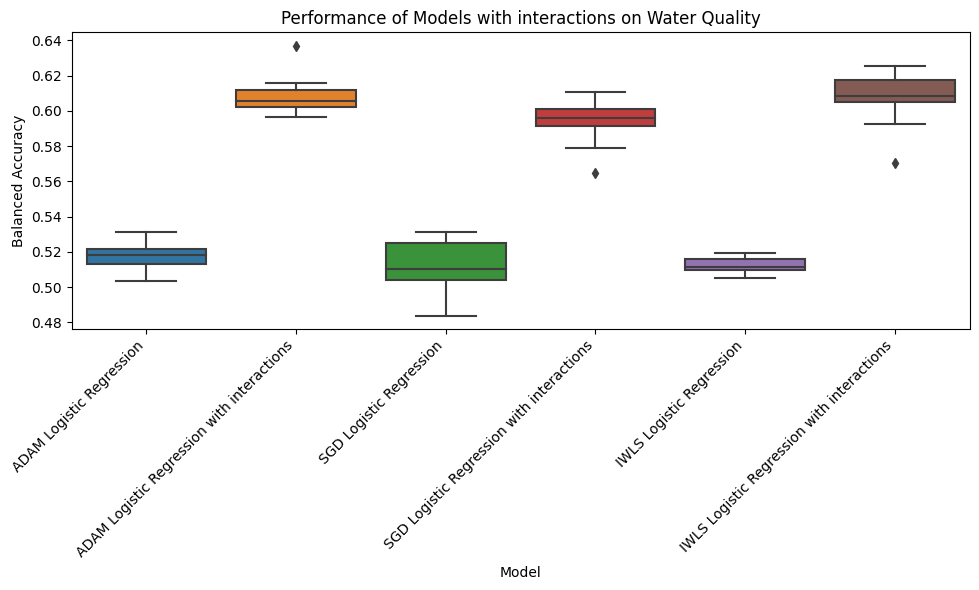

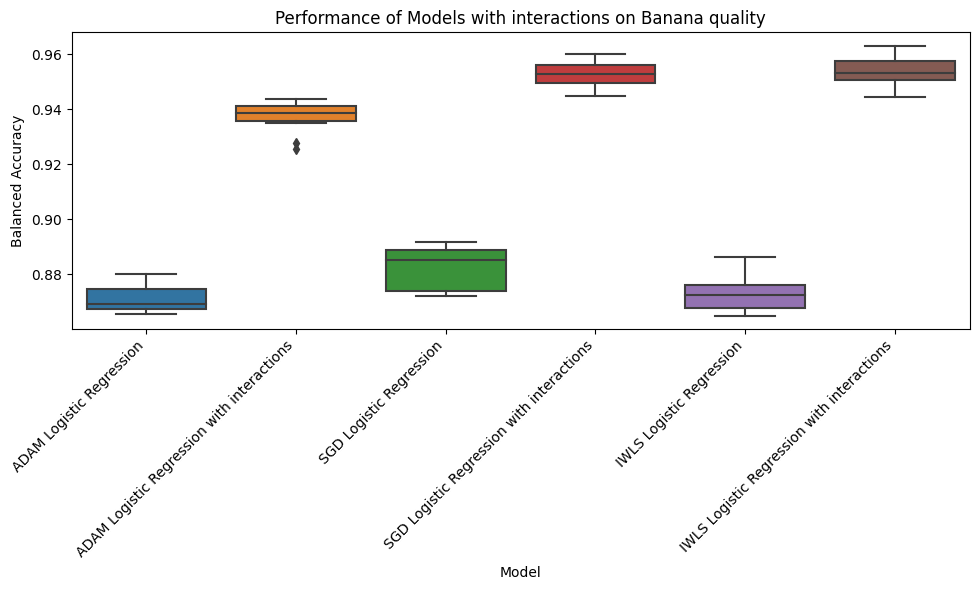

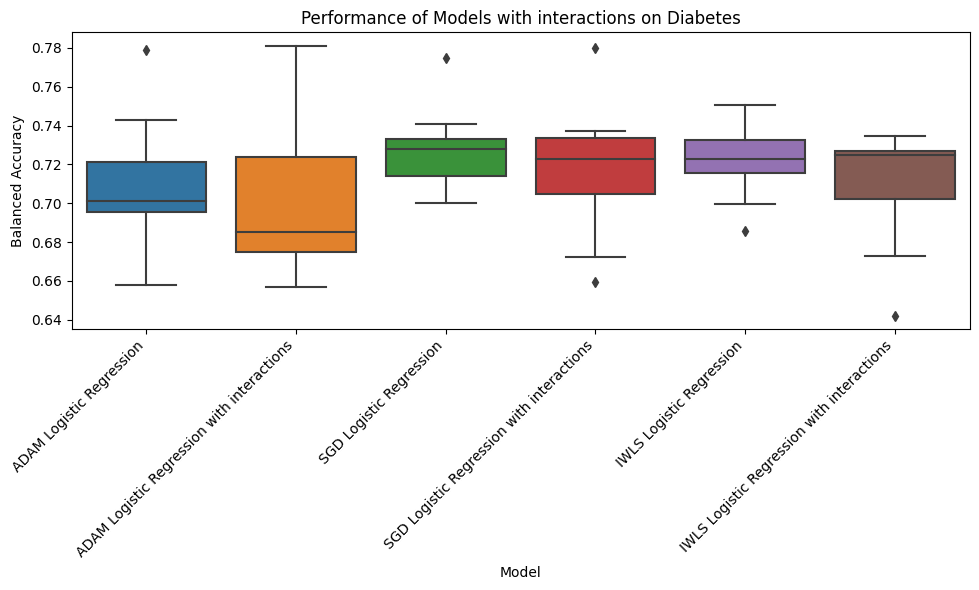

In [7]:
for dataset_name, performances in dataset_performances2.items():
    plt.figure(figsize=(10, 6))
    plt.title(f"Performance of Models with interactions on {dataset_name}")
    df = pd.DataFrame(performances)

    sns.boxplot(data=df)

    plt.xlabel("Model")
    plt.ylabel("Balanced Accuracy")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    title_ = dataset_name.lower().replace(" ", "_")
    plt.savefig(f"plots/comparison_interactions/{title_}.png")
    plt.show()
